In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [ ]:
data1 = pd.read_csv('/content/titanic.csv')
data1

In [ ]:
data1.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [ ]:
data2 = pd.read_csv('/content/StudentsPerformance.csv')
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#cреднее значение для тех кто ест стандартно
change_data = data2[data2["lunch"] == "standard"]
sum = change_data["math score"].mean() + change_data["reading score"].mean() + change_data["writing score"].mean()
sum

212.51162790697674

In [ ]:
#для тех, кто ест меньше
change_data = data2[data2["lunch"] == "free/reduced"]
sum = change_data["math score"].mean() + change_data["reading score"].mean() + change_data["writing score"].mean()
sum

186.59718309859156

In [ ]:
change_data = data2[(data2["lunch"] == "free/reduced")]
change_data['math score'].describe()


count    355.000000
mean      58.921127
std       15.159956
min        0.000000
25%       49.000000
50%       60.000000
75%       69.000000
max      100.000000
Name: math score, dtype: float64

In [ ]:
change_data['reading score'].mean()


64.65352112676057

In [ ]:
change_data['writing score'].mean()

63.02253521126761

## Заменяем пропуски данных

In [ ]:
df_practice7['session_value'].fillna(0)

0      2
1     -1
2      0
3      2
4      0
      ..
495    1
496    3
497   -1
498    1
499    0
Name: session_value, Length: 500, dtype: int64

## метод rename

In [ ]:
data2 = data2.rename(columns= {
    'parental level of education': 'education',
    'test preparation course': 'test',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score',
})
data2

,gender,race/ethnicity,education,lunch,test,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## метод query

In [ ]:
data2.query('(math_score > 70) & (gender == "female")')
# для сравнение переменной data2.query('(math_score > 70) & @num')

,gender,race/ethnicity,education,lunch,test,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
...,...,...,...,...,...,...,...,...
979,female,group C,associate's degree,standard,none,91,95,94
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
995,female,group E,master's degree,standard,completed,88,99,95


In [ ]:
#выберем отдельно колнки score

#1) представим в виле списка
list(data2)

#2) запишем условие
score = [i for i in list(data2 ) if 'score' in i]
#тем самым мы выбрали три колонки с именем score
data2[score]

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [ ]:
#второй способ
data2.filter(like="score")

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [ ]:
data2[data2['education'].isin(["bachelor's degree", "master's degree"])]
#выборка по образованию

,gender,race/ethnicity,education,lunch,test,math_score,reading_score,writing_score,sum_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
2,female,group B,master's degree,standard,none,90,95,93,278
14,female,group A,master's degree,standard,none,50,53,58,161
18,male,group C,master's degree,free/reduced,completed,46,42,46,134
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80,225
...,...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100,292
969,female,group B,bachelor's degree,standard,none,75,84,80,239
970,female,group D,bachelor's degree,standard,none,89,100,100,289
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208


Методы groupby и aggregate

In [ ]:
data2.groupby('gender', as_index=False) \
.aggregate({'math_score': 'mean', 'reading_score': 'mean', 'writing_score': 'mean'}) \
.rename(columns={'math_score': 'mean_math_score', 'reading_score': 'mean_reading_score', 'writing_score': 'mean_writing_score',})

,gender,mean_math_score,mean_reading_score,mean_writing_score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


In [ ]:
mean_scores = data2.groupby(['gender', 'race/ethnicity'], as_index=False) \
.aggregate({'math_score': 'mean', 'reading_score': 'mean', 'writing_score': 'mean'}) \
.rename(columns={'math_score': 'mean_math_score', 'reading_score': 'mean_reading_score', 'writing_score': 'mean_writing_score',})
mean_scores

,gender,race/ethnicity,mean_math_score,mean_reading_score,mean_writing_score
0,female,group A,58.527778,69.000000,67.861111
1,female,group B,61.403846,71.076923,70.048077
2,female,group C,62.033333,71.944444,71.777778
3,female,group D,65.248062,74.046512,75.023256
4,female,group E,70.811594,75.840580,75.536232
5,male,group A,63.735849,61.735849,59.150943
6,male,group B,65.930233,62.848837,60.220930
7,male,group C,67.611511,65.424460,62.712230
8,male,group D,69.413534,66.135338,65.413534
9,male,group E,76.746479,70.295775,67.394366


In [ ]:
#выделим среднее значения определённной группы
mean_scores.loc(['female', 'group A'])


TypeError: ignored

In [ ]:
#отобразим сгрупированные значения по их результату
data2.groupby(['gender', 'race/ethnicity'], as_index=False).math_score.nunique()

,gender,race/ethnicity,math_score
0,female,group A,29
1,female,group B,51
2,female,group C,59
3,female,group D,53
4,female,group E,44
5,male,group A,38
6,male,group B,43
7,male,group C,56
8,male,group D,49
9,male,group E,38


In [ ]:
#найдём топ 5 студентов по математике
data2.sort_values(['gender', 'math_score'], ascending=False) \
.groupby('gender').head(5)
 #прописываем ascending для отображания с лушего к худшему

,gender,race/ethnicity,education,lunch,test,math_score,reading_score,writing_score,sum_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293
623,male,group A,some college,standard,completed,100,96,86,282
625,male,group D,some college,standard,completed,100,97,99,296
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
306,male,group E,some college,standard,completed,99,87,81,267
451,female,group E,some college,standard,none,100,92,97,289
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
263,female,group E,high school,standard,none,99,93,90,282


In [ ]:
#сумма за три теста
data2['sum_score'] = data2.math_score + data2.reading_score + data2.writing_score
data2['sum_score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: sum_score, Length: 1000, dtype: int64

In [ ]:
#log суммы
data2['log_score'] = np.log(data2.sum_score)
data2['log_score']

0      5.384495
1      5.509388
2      5.627621
3      4.997212
4      5.433722
         ...   
995    5.641907
996    5.147494
997    5.273000
998    5.407172
999    5.517453
Name: log_score, Length: 1000, dtype: float64

In [ ]:
#удаление
data2.drop(columns=['log_score'])

In [ ]:
data3 = pd.read_csv('/content/accountancy.csv')
data3

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184
5,5,Loopa,F,232
6,6,Loopa,B,249
7,7,Pupa,F,195
8,8,Pupa,A,115
9,9,Pupa,E,65


In [ ]:
mean_salary = data3.groupby(['Executor', 'Type'], as_index='Executor').aggregate({'Salary': 'mean'})
mean_salary

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [ ]:
data4 = pd.read_csv('/content/dota_hero_stats.csv')
data4

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [ ]:
top = data4.groupby(['attack_type', 'primary_attr'])
top['attack_type'].value_counts()


attack_type  primary_attr  attack_type
Melee        agi           Melee          19
             int           Melee           2
             str           Melee          35
Ranged       agi           Ranged         18
             int           Ranged         40
             str           Ranged          3
Name: attack_type, dtype: int64

## графическое отображение

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

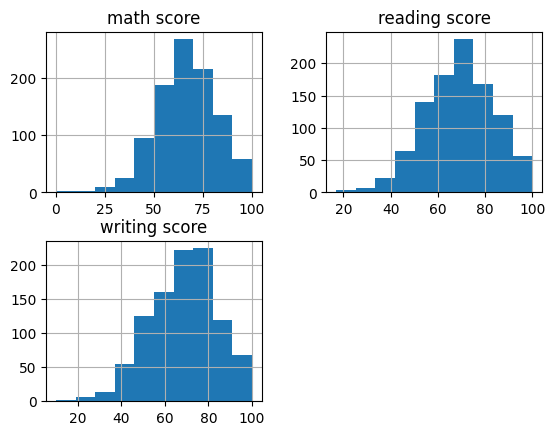

In [ ]:
data2.hist()

<Axes: xlabel='math score', ylabel='reading score'>

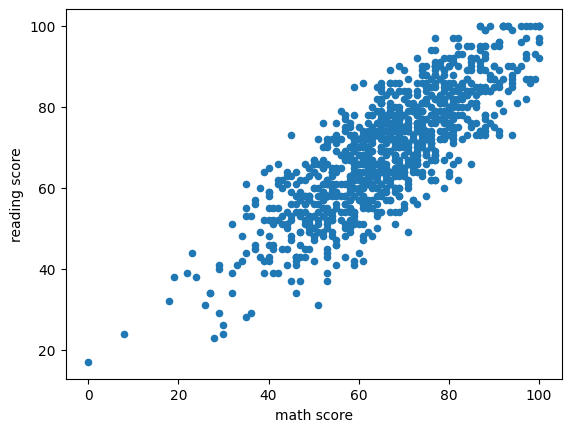

In [ ]:
data2.plot.scatter(x="math score", y="reading score")

AttributeError: ignored

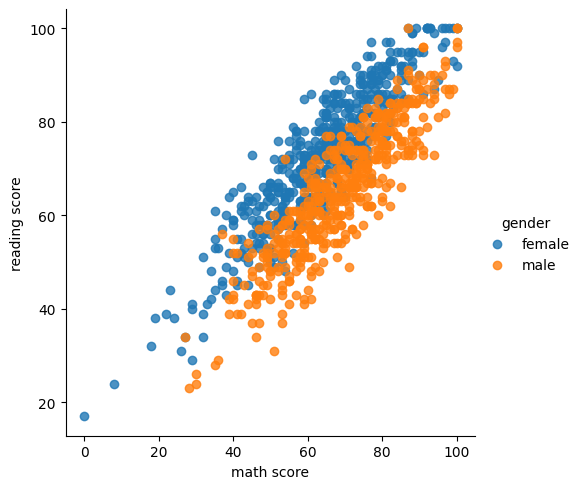

In [ ]:
ax = sns.lmplot(x="math score", hue="gender", y="reading score", data=data2, fit_reg=False) #библиотека sns для графиков

#название оси x
ax.set_xlabes('Math score')
#название оси y
ax.set_ylabes('reading score')

## Практическое задание

In [ ]:
df_practise1 = pd.read_csv('/content/algae.csv')
df_practise1

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [ ]:
mean_concentrations = df_practise1.groupby(['genus']).aggregate({'sucrose': 'mean', 'alanin': 'mean', 'citrate': 'mean', 'glucose': 'mean', 'glucose': 'mean'})

In [ ]:
alanin = df_practise1.groupby(['genus'])
alanin['alanin'].describe()

,count,mean,std,min,25%,50%,75%,max
genus,,,,,,,,
Ascophyllum,1.0,0.875429,NaN,0.875429,0.875429,0.875429,0.875429,0.875429
Cladophora,3.0,3.997055,2.657050,1.648450,2.555071,3.461692,5.171358,6.881024
Fucus,3.0,3.566411,3.149943,0.346431,2.028965,3.711498,5.176401,6.641303
Palmaria,1.0,3.176440,NaN,3.176440,3.176440,3.176440,3.176440,3.176440
Saccharina,2.0,3.524207,3.208789,1.255251,2.389729,3.524207,4.658685,5.793163


In [ ]:
group_df = df_practise1.get_group('group')
variance = group_df['brown'].var()

AttributeError: ignored

In [ ]:
df_practice2 = pd.read_csv('/content/income.csv')

In [ ]:
df_practice2

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


In [ ]:
df_practice3 = pd.read_csv('/content/dataset_209770_6 (5).txt', sep=" ")
df_practice3

,x,y
0,201.400004,813.283574
1,1206.013094,187.084108
2,1494.970296,415.331468
3,100.456177,702.022147
4,300.834520,1197.359698
...,...,...
65,1287.673567,1494.115041
66,1196.398745,206.950273
67,1502.383459,384.114197
68,609.154654,1293.630654


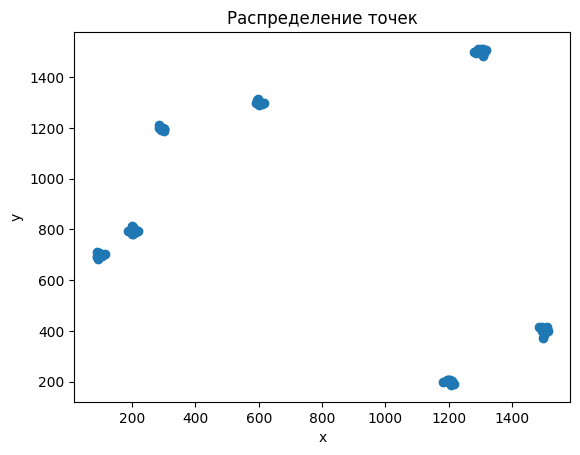

In [ ]:
#виды нарисовки простого графика зависимости зарплаты от даты
#ax = df_practice2.plot()
#ax = sns.lineplot(x=df_practice3.index, y=df_practice3.income)
#ax

plt.scatter(df_practice3['x'], df_practice3['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Распределение точек')
plt.show()

## Построение теплокарты

In [ ]:
df_practice4 = pd.read_csv('/content/genome_matrix.csv')
df_practice4

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


<ipython-input-33-a0a9dc0f85ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(df_practice4.corr(), cmap="viridis")


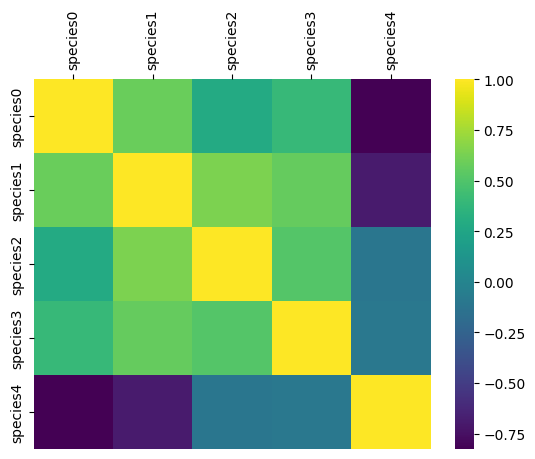

In [ ]:
g = sns.heatmap(df_practice4.corr(), cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

## Постороение глистограмм

In [ ]:
df_practice5 = pd.read_csv('/content/dota_hero_stats (1).csv')
df_practice5

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [ ]:
df_practice5 = pd.read_csv('/content/dota_hero_stats (1).csv')


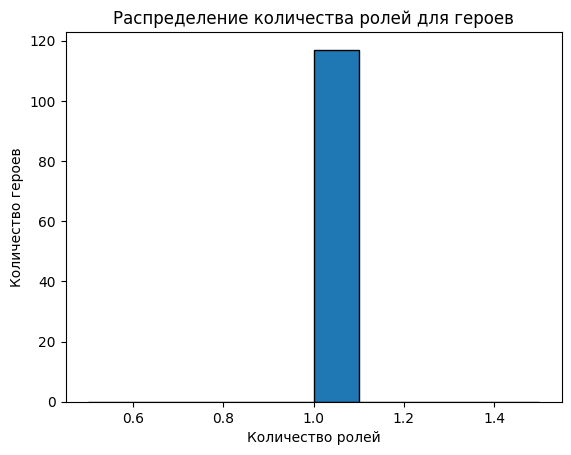

In [ ]:
# Подсчет количества ролей для каждого героя
role_counts = df_practice5['name'].value_counts()

# Построение гистограммы
plt.hist(role_counts, bins=10, edgecolor='black')

# Добавление подписей осей и заголовка
plt.xlabel('Количество ролей')
plt.ylabel('Количество героев')
plt.title('Распределение количества ролей для героев')

# Отображение гистограммы
plt.show()

In [ ]:
df_practice5['roles_count'] = df_practice5['roles'].apply(lambda x: len(eval(x)))
#отображаем количество

Text(0, 0.5, 'Колтчесвто героев')

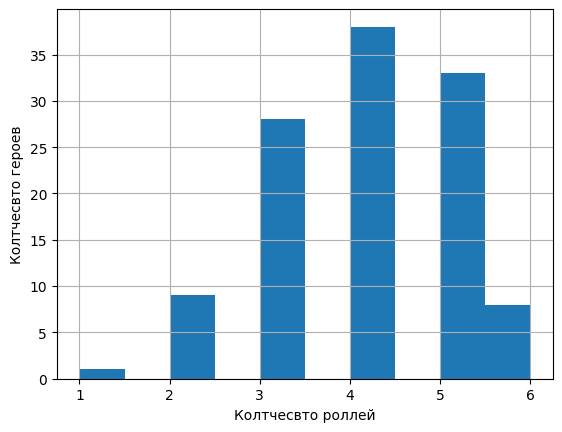

In [ ]:
df_practice5['roles_count'].hist()
plt.xlabel('Колтчесвто роллей')
plt.ylabel('Колтчесвто героев')

In [ ]:
df_practice6

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [ ]:
df_practice6 = pd.read_csv('/content/iris.csv')

# sns violine

<Axes: xlabel='petal length'>

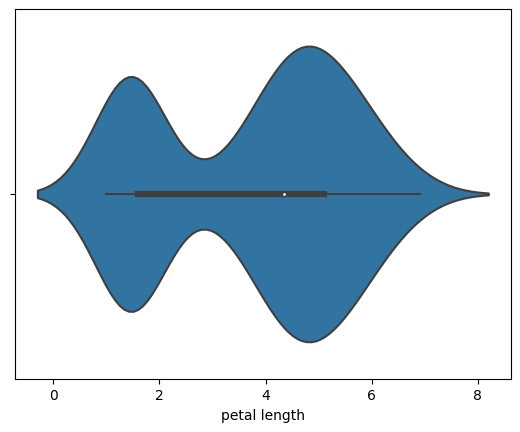

In [ ]:
sns.violinplot(x=df_practice6["petal length"])

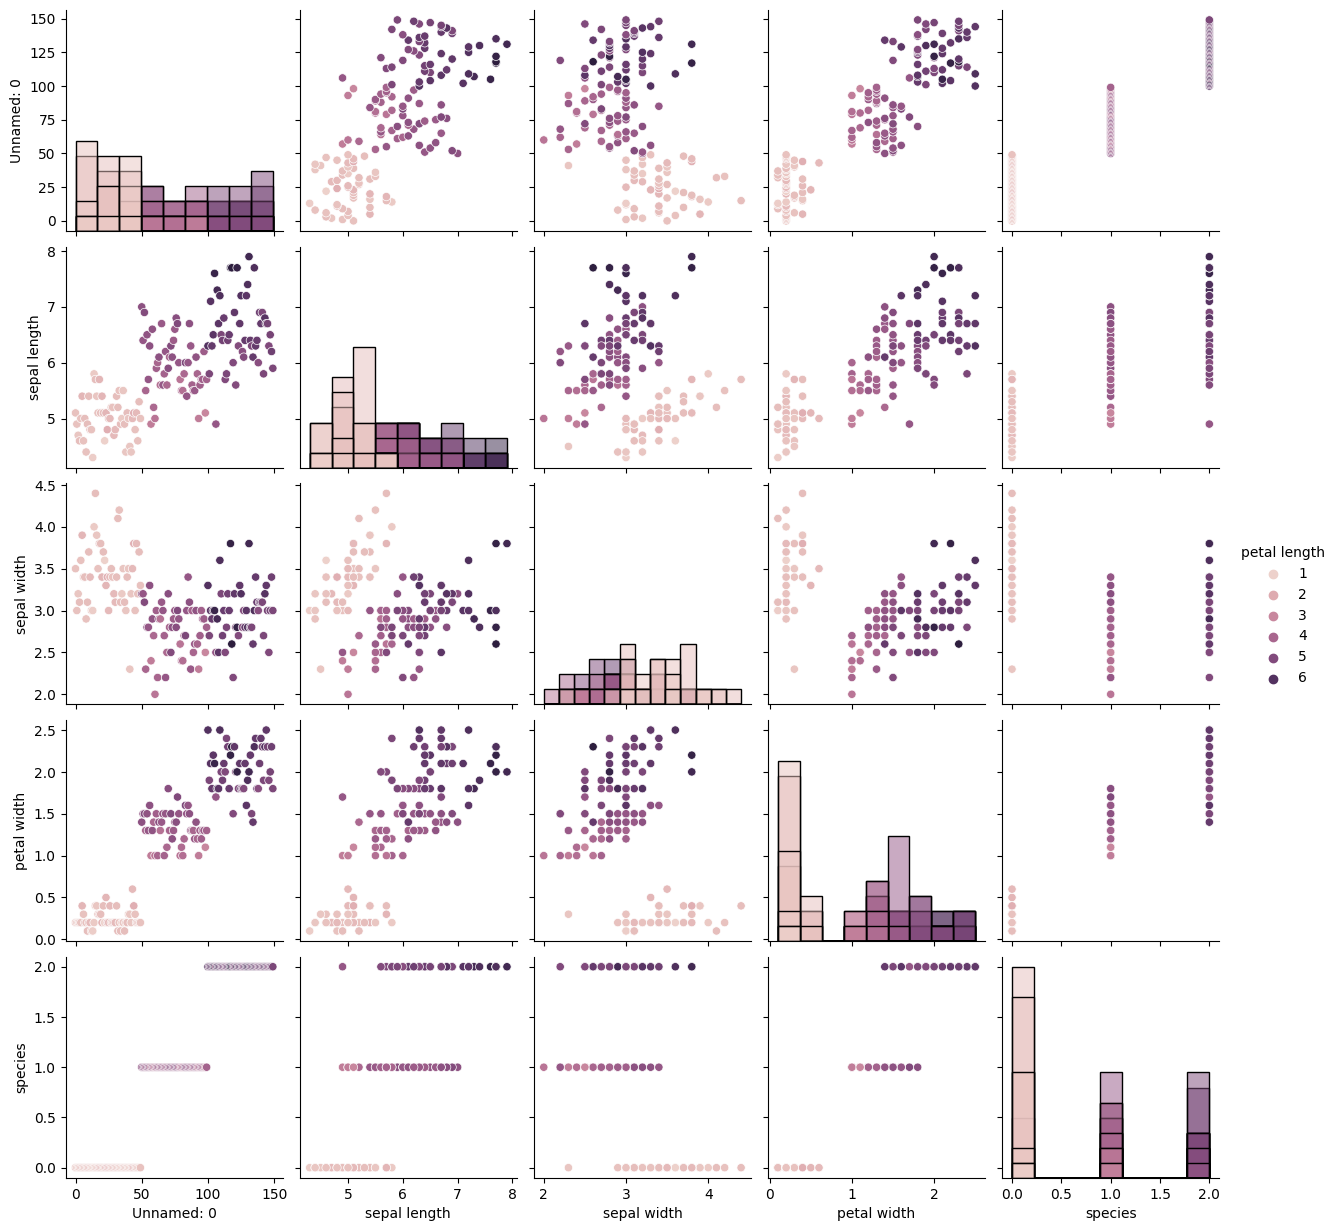

In [ ]:
sns.pairplot(df_practice6, hue='petal length', diag_kind="hist")

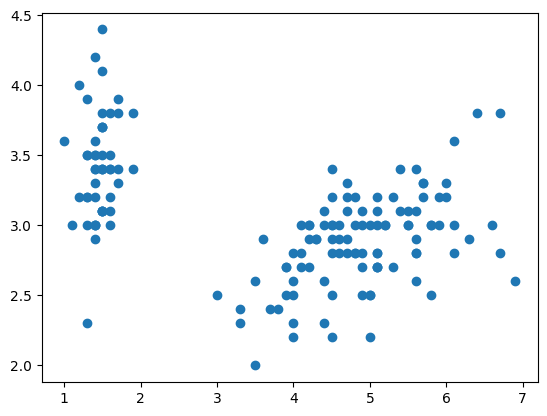

In [ ]:
plt.scatter(df_practice6['petal length'], df_practice6['sepal width'])

## Создание своего df

In [ ]:
d = {'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 23]}
df = pd.DataFrame(data=d)
df

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


## Распределиние всех колонок на одном графике через seaborn

In [ ]:
s = df_practice6.filter(like="sepal")
p = df_practice6.filter(like="petal")

<ipython-input-48-4f6f1b4501f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_practice6['petal width'], color = "red")


<Axes: xlabel='petal width', ylabel='Density'>

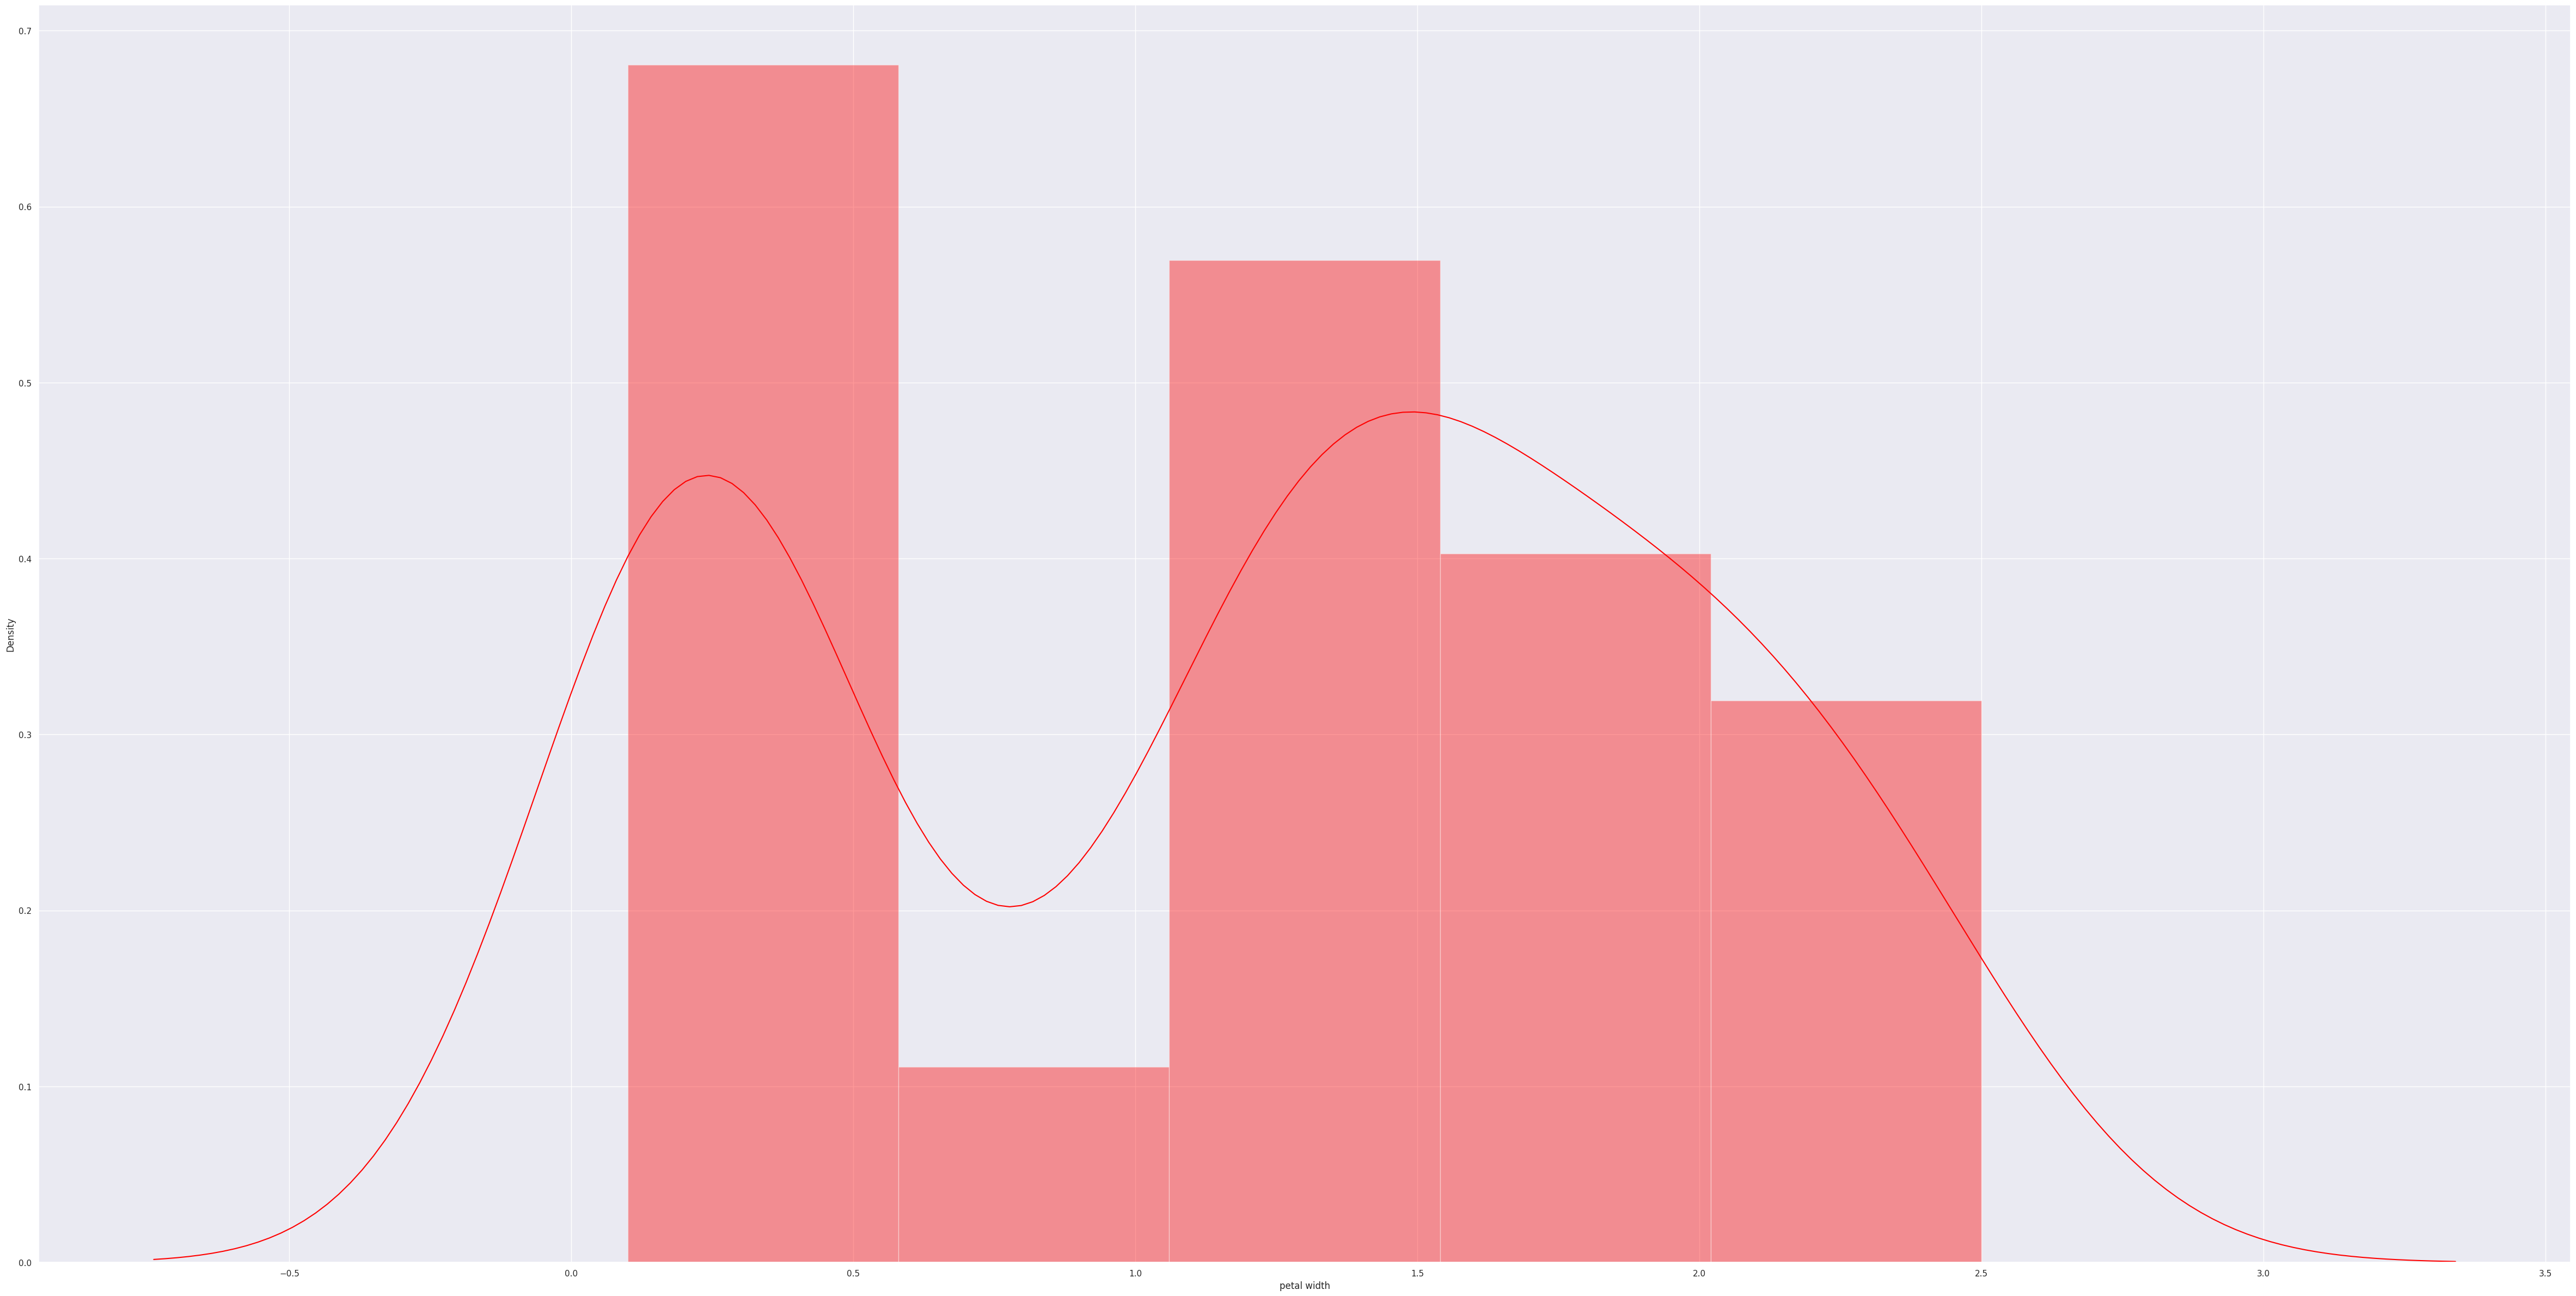

In [ ]:
sns.distplot(df_practice6['petal width'], color = "red")

<ipython-input-42-cd11915add6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_practice6['petal width'], color = "blue")


<Axes: xlabel='petal width', ylabel='Density'>

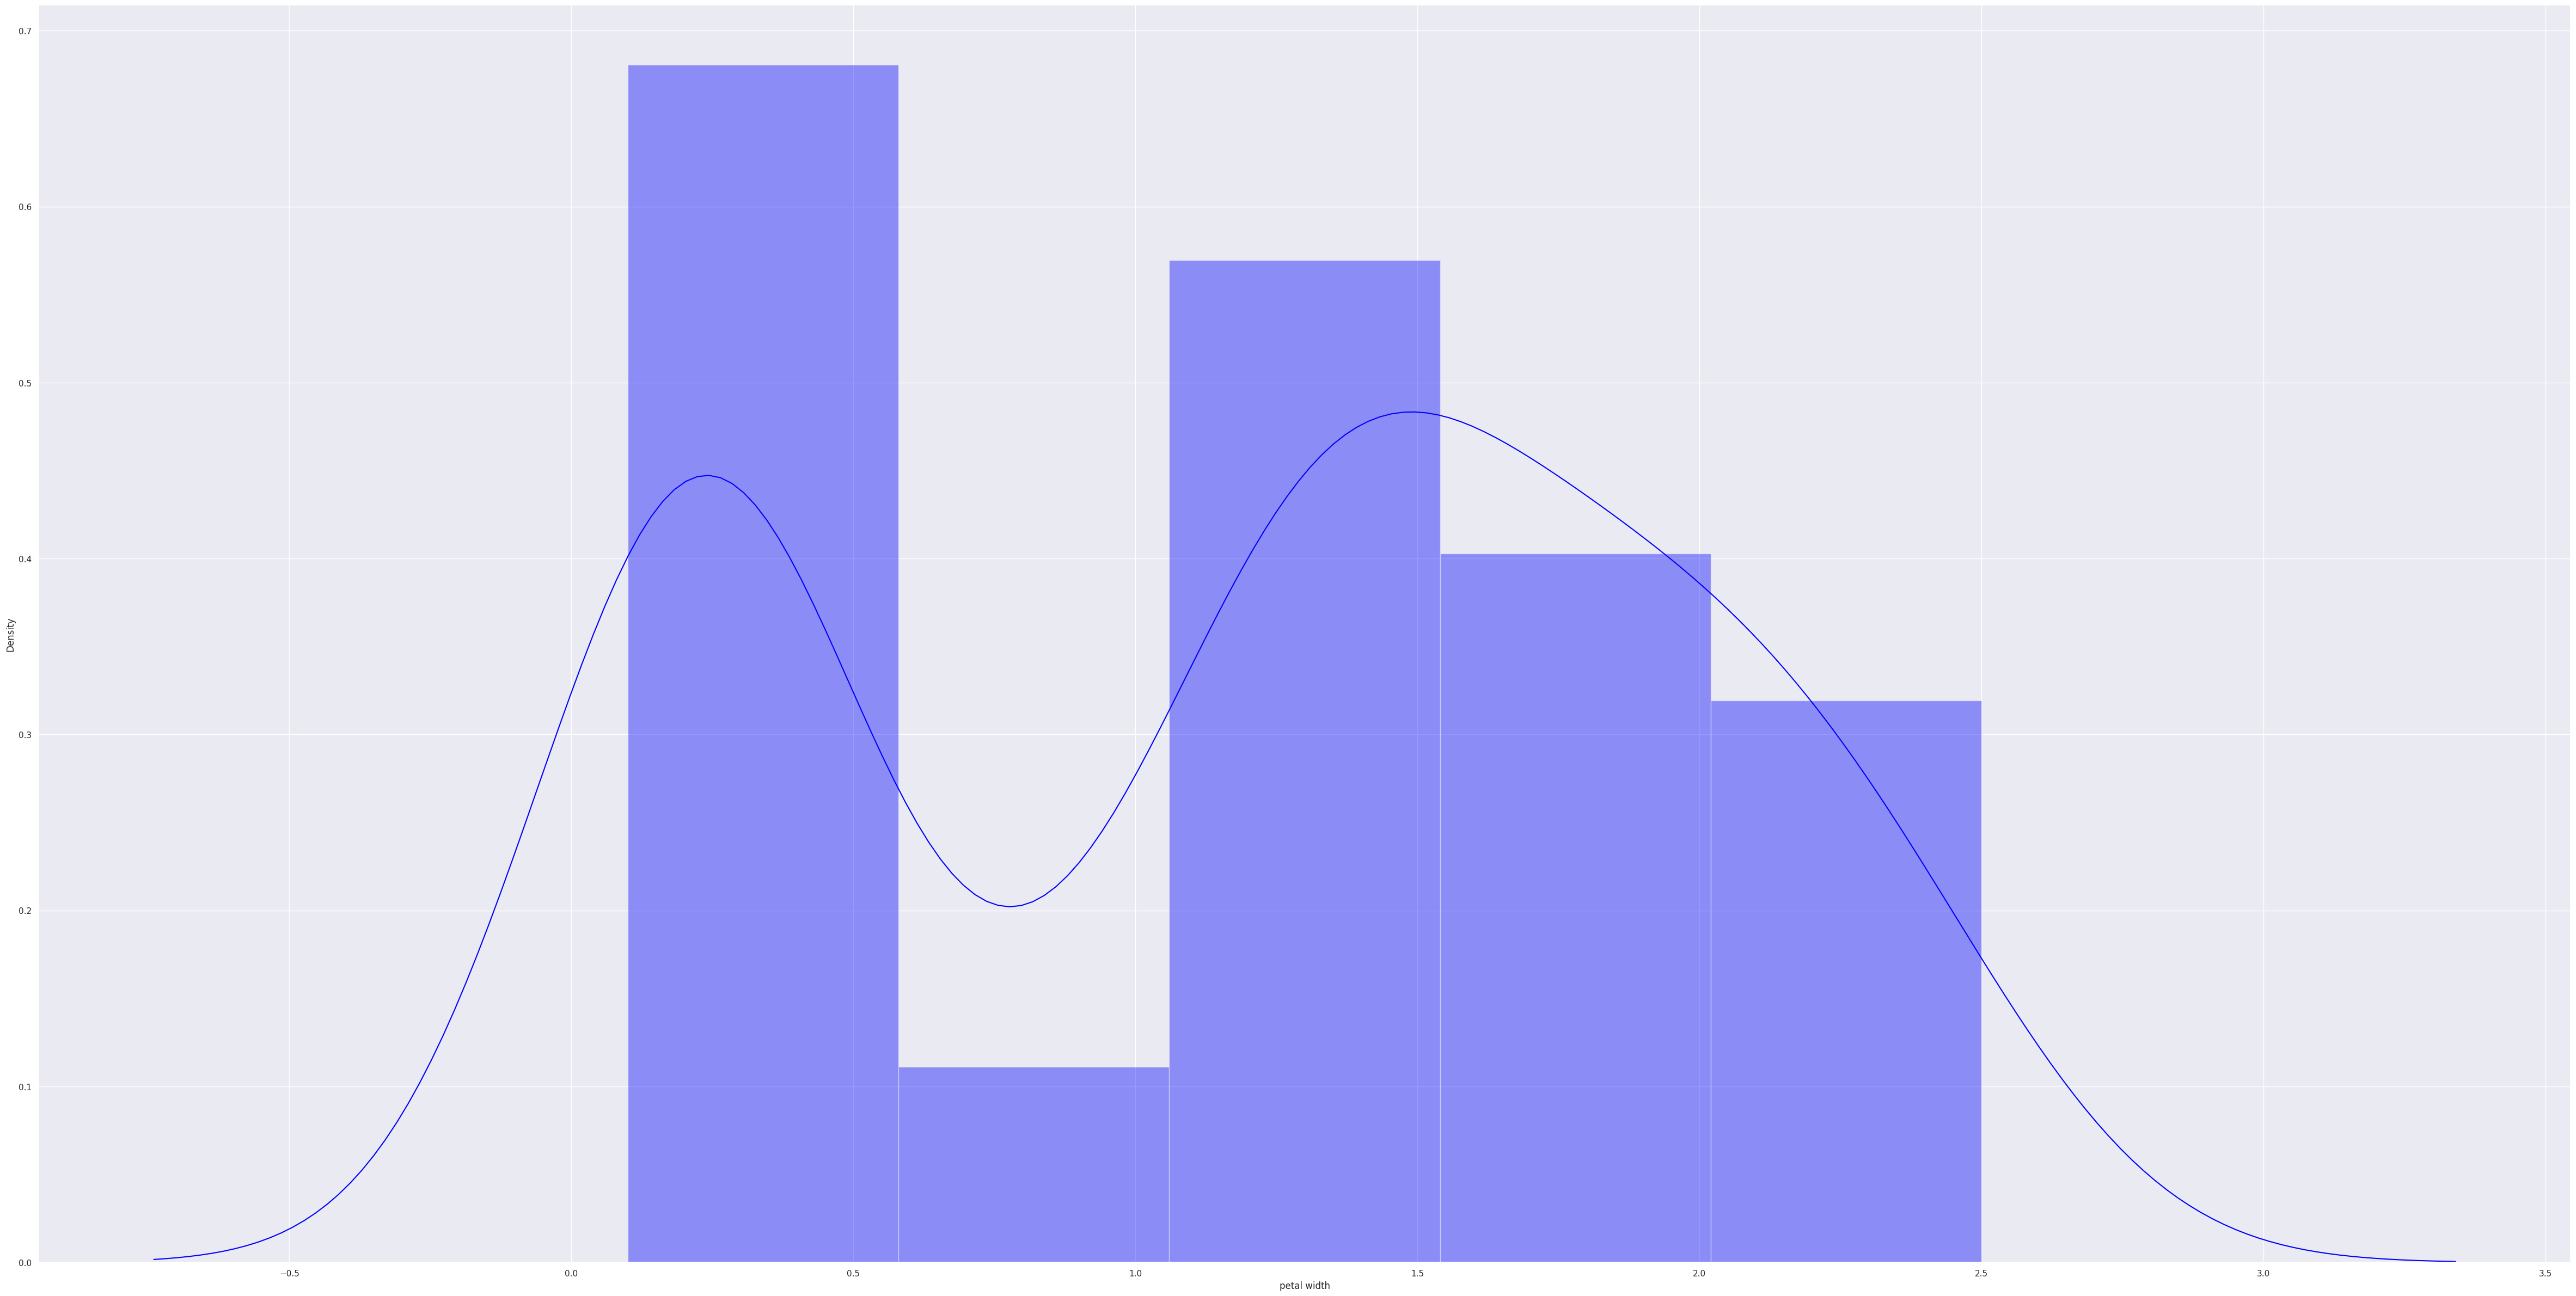

In [ ]:
sns.distplot(df_practice6['petal width'], color = "blue")

<Axes: ylabel='Density'>

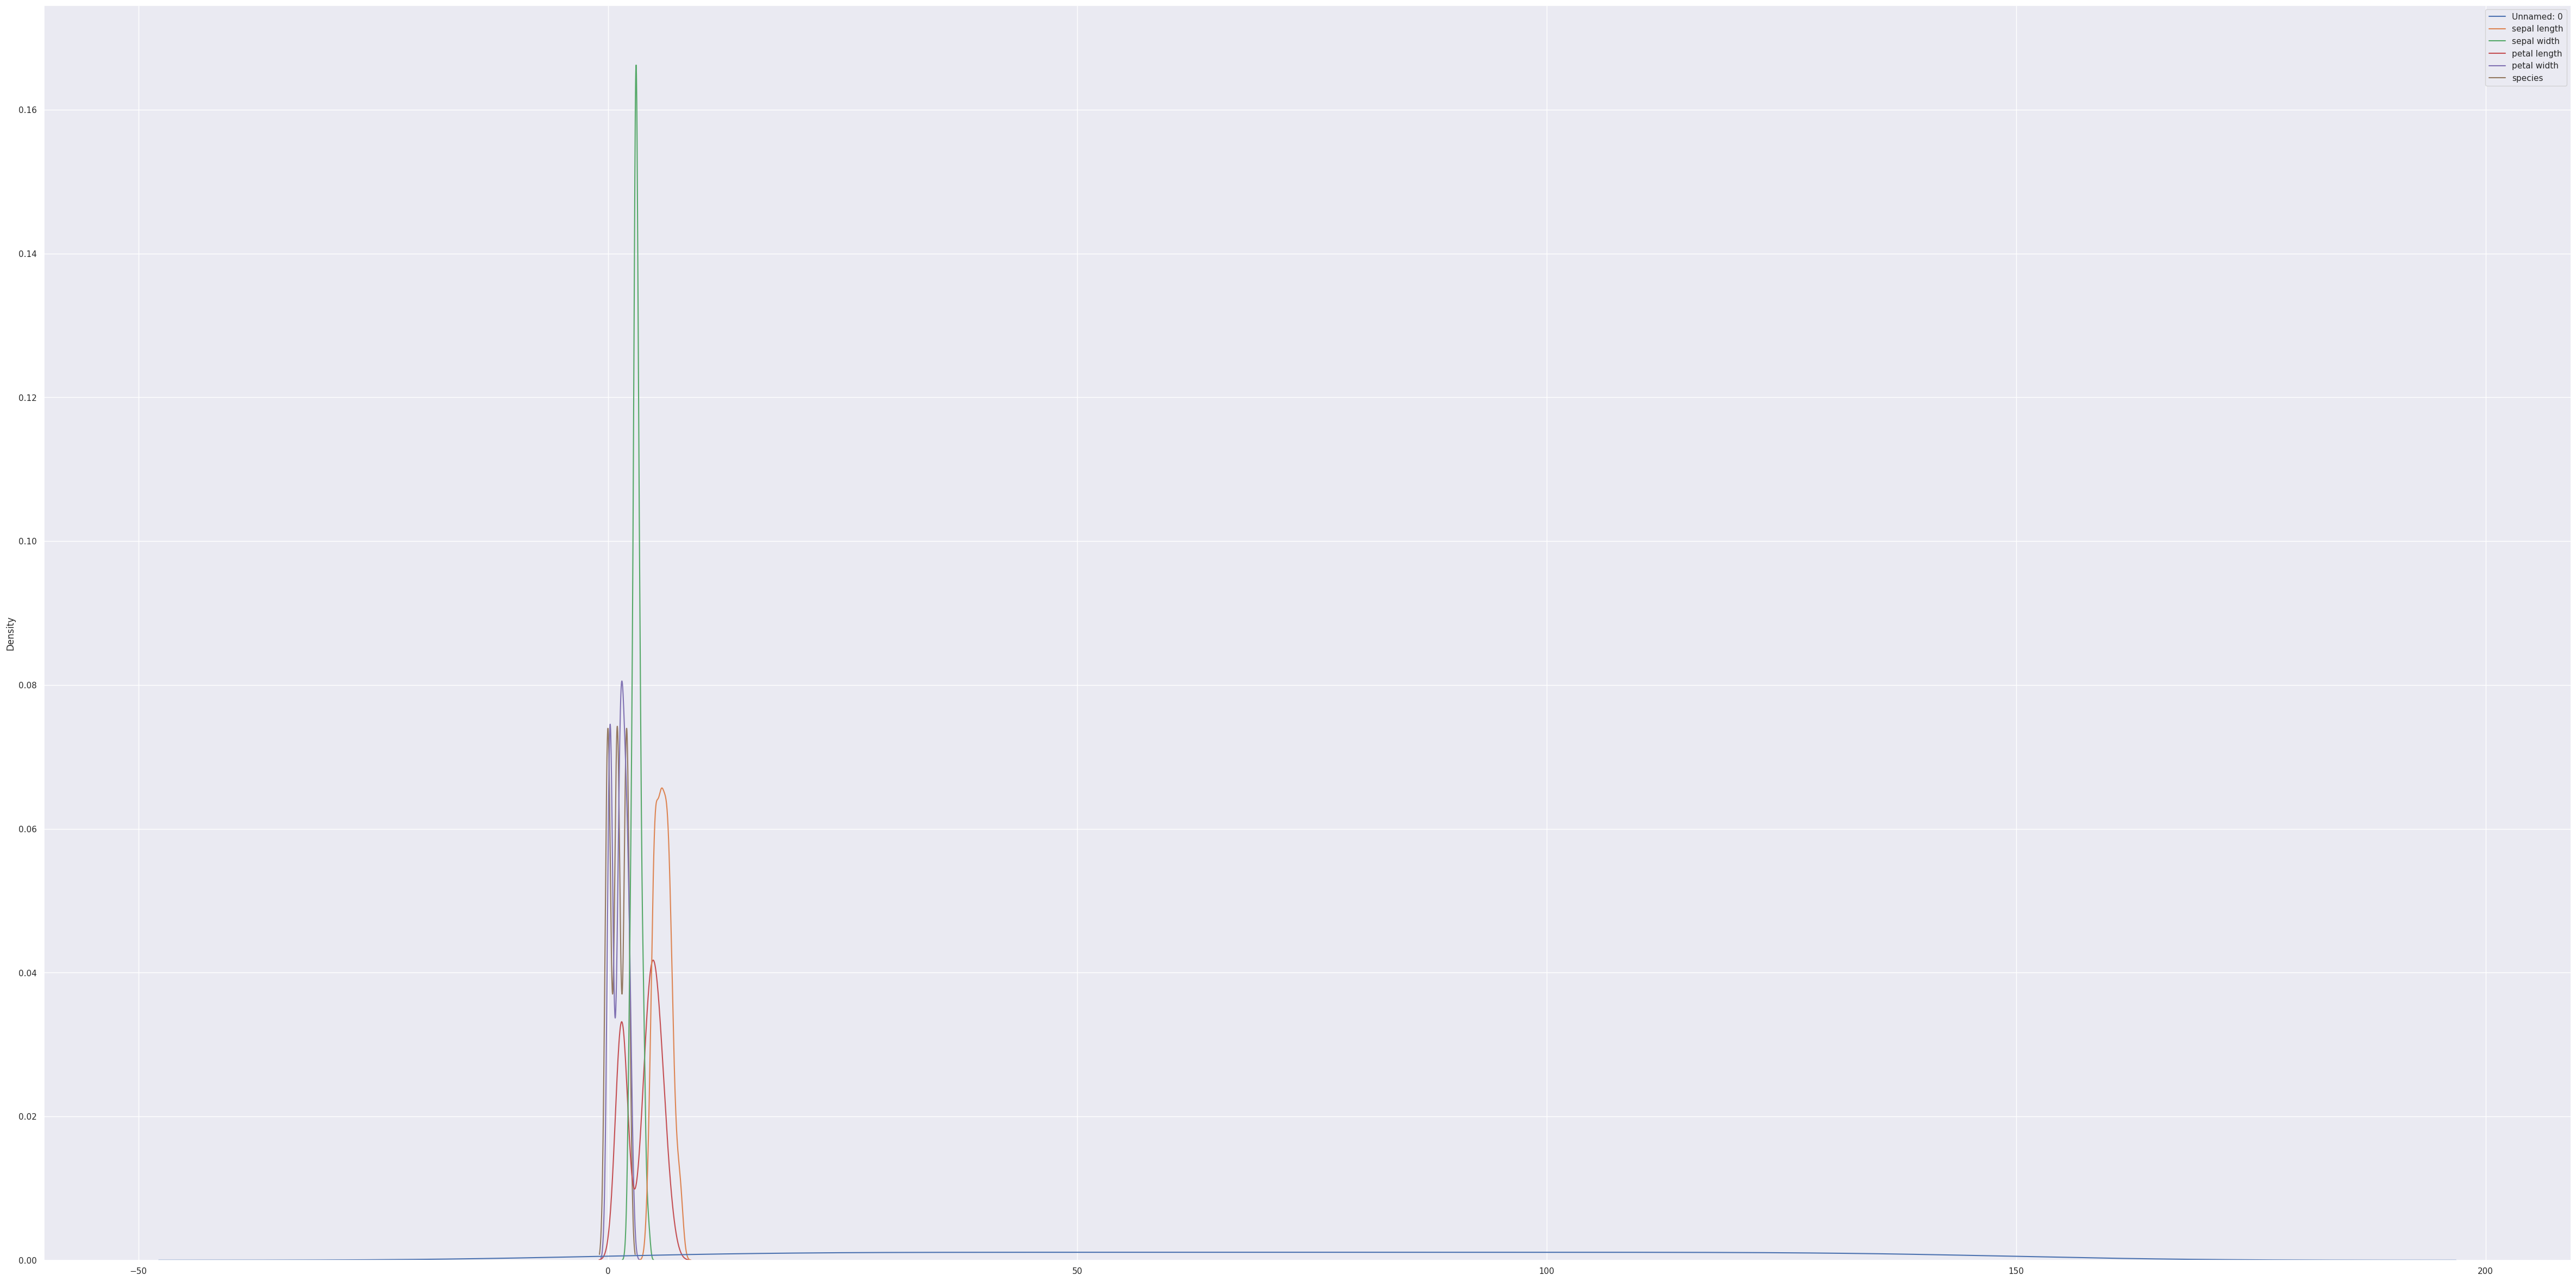

In [ ]:

sns.kdeplot(data=df_practice6)

<ipython-input-24-cdd6ad63bffa>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_practice6[column], shade=True)
<ipython-input-24-cdd6ad63bffa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_practice6[column], hist=False)
<ipython-input-24-cdd6ad63bffa>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_practice6[column], shade=True)
<ipython-input-24-cdd6ad63bffa>:3: UserWarning

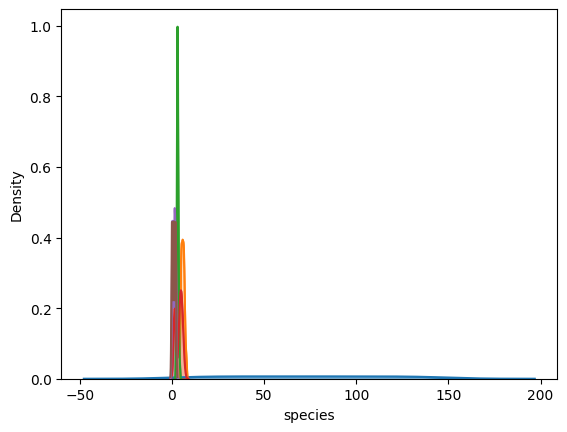

In [ ]:
for column in df_practice6:
    sns.kdeplot(df_practice6[column], shade=True)
    sns.distplot(df_practice6[column], hist=False)

plt.show()


In [ ]:
df_practice7 = pd.read_csv('/content/my_stat.csv')
df_practice7

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


## Функция apply действует для всех элементов и с помощью неё можно делать приображения с столбцами

In [ ]:
subset_1 = subset_1.apply(str).head(10) + df_practice7['V3'].head(10)

NameError: ignored

In [ ]:
a = df_practice7['V1']
a.drop([0, 1])
a.drop([4, 5])
a.head(10)

0    2
1   -1
2    0
3    2
4    0
5    2
6    0
7    1
8    0
9   -1
Name: V1, dtype: int64

In [ ]:
df_practice7

In [ ]:
df_practice7['V5'] = df_practice7['V1'] + df_practice7['V2']
df_practice7['V6'] = np.log(df_practice7['V2'])


In [ ]:
df_practice7 = df_practice7.rename(columns={
    'V1': 'session_value',
    'V2': 'group',
    'V3': 'time',
    'V4': 'n_users'
})


In [ ]:
mean_session_value_data = my_stat.groupby('group').agg(mean_session_value=('session_value', 'mean'))
mean_session_value_data

,mean_session_value_data
group,
5.0,0.000000
7.0,0.333333
8.0,0.633333
9.0,0.238938
10.0,0.065990
11.0,-0.081081
12.0,-0.078947
13.0,0.000000


## Практика по курсам stepic

In [ ]:
stepik_user = pd.read_csv('/content/event_data_train.csv')

In [ ]:
stepik_user.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [ ]:
#переделываем в стандарную дату
stepik_user['date'] = pd.to_datetime(stepik_user.timestamp, unit='s')

In [ ]:
stepik_user['day'] = stepik_user.date.dt.date

In [ ]:
graph = stepik_user.groupby('day').user_id.nunique()

<Axes: xlabel='day'>

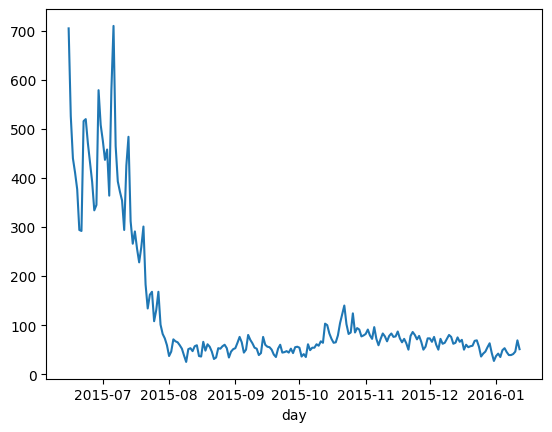

In [ ]:
graph.plot()

In [ ]:
passed = stepik_user[stepik_user.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}).rename(columns={'user_id': 'passed_steps'}).head(10)

<Axes: >

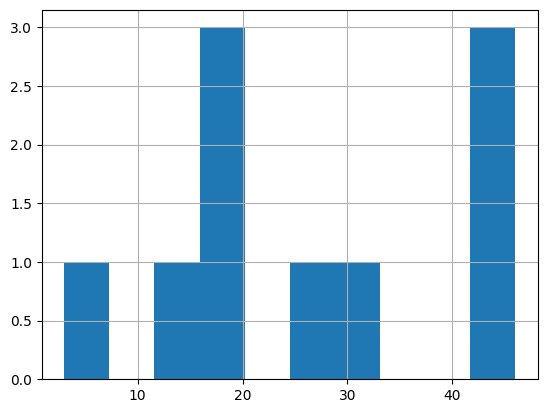

In [ ]:
passed.passed_steps.hist()

<Axes: >

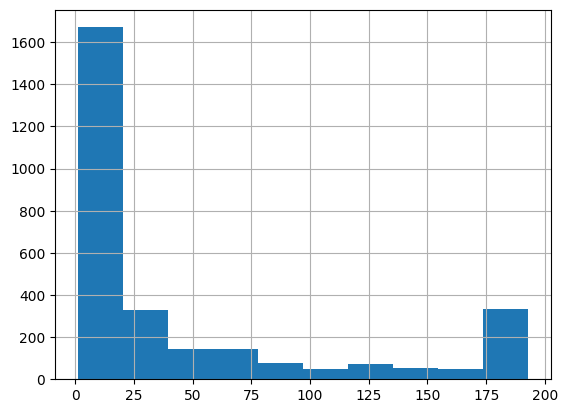

In [ ]:
stepik_user.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index().discovered.hist()

In [ ]:
stepik_submissions = pd.read_csv('/content/submissions_data_train.csv')

In [ ]:
stepik_submissions['date'] = pd.to_datetime(stepik_submissions.timestamp, unit='s')
stepik_submissions['day'] = stepik_submissions.date.dt.date

In [ ]:
stepik_submissions

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [ ]:
sub_score = stepik_submissions.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()


In [ ]:
sub_score = stepik_submissions.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

In [ ]:
karpov = sub_score.groupby('user_id')['correct'].sum()

In [ ]:
pd.Series(karpov).sort_values()

user_id
22862      0
12222      0
871        0
22080      0
25472      0
        ... 
8461     135
6183     142
17135    168
5552     186
1046     421
Name: correct, Length: 9940, dtype: int64

нашли кол-во правильных и не правильных сабмитов задач за всё время

In [ ]:
sub_score

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


Находим дни, когда пользователь был в сети и выполнял задания
убираем дубликаты и посмотрим время захода

In [ ]:
stepik_submissions[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby('user_id')['timestamp'].apply(list)

user_id
2                                             [1514383485]
3        [1441259266, 1434359432, 1441489974, 144430484...
5                                             [1499859668]
8                                             [1480603825]
14                                            [1436368601]
                               ...                        
26787                                         [1469015051]
26790                                         [1451722691]
26794     [1495292610, 1495384220, 1495525233, 1511374868]
26797                                         [1508425828]
26798                                         [1520978063]
Name: timestamp, Length: 9940, dtype: object

находим разность между двум последними заходами на курс np.diff

In [ ]:
time = stepik_submissions[['user_id', 'day', 'timestamp']] \
    .drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [ ]:
time1 = pd.Series(np.concatenate(time, axis=0))
time1 = time1 / (24 * 60 * 60) # находим сколько прощло дней после последнего за

2520292.0000000014

In [ ]:
#находим через сколько приходят на курс 90% пользователей

time1.quantile(0.90)

29.17004629629631

In [ ]:
stepik_submissions

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


# Найдём максимальное врнмя отсутвие и распредели, кто больше не роходит курс

In [ ]:
last_sub = stepik_submissions.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_time'})

In [ ]:
stepik_submissions.tail()

,step_id,timestamp,submission_status,user_id,date,day
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06
509103,120745,1523382825,wrong,9422,2018-04-10 17:53:45,2018-04-10


In [ ]:
#сколько прошло от поледнего захожа до выгрузки данных
last_sub['now'] = 1523382825 - last_sub.last_time

In [ ]:
now = 1523382825
drop_user= 2520292

In [ ]:
last_sub['active'] = (now - last_sub.last_time) > drop_user

# Обиединение df merge

In [ ]:
last_sub = last_sub.merge(sub_score, on='user_id', how='outer')

,user_id,last_time,active,correct,wrong
0,2,1514383485,True,2,0
1,3,1444573728,True,29,23
2,5,1499859730,True,2,2
3,8,1480604143,True,9,21
4,14,1436368601,True,0,1
...,...,...,...,...,...
9935,26787,1469015051,True,3,0
9936,26790,1451722691,True,1,0
9937,26794,1511374868,True,33,9
9938,26797,1508425828,True,2,0


In [ ]:
last_sub.fillna(0)

,user_id,last_time,active
0,2,1514383485,True
1,3,1444573728,True
2,5,1499859730,True
3,8,1480604143,True
4,14,1436368601,True
...,...,...,...
9935,26787,1469015051,True
9936,26790,1451722691,True
9937,26794,1511374868,True
9938,26797,1508425828,True


In [ ]:
last_sub = stepik_user.merge(stepik_user, how='outer')

In [ ]:
last_sub =  stepik_user.groupby('user_id').day.nunique()
last_sub.to_frame().reset_index() #переводимм в таблицу

,user_id,day
0,3,7
1,14,1
2,16,14
3,18,1
4,20,1
...,...,...
5521,26778,1
5522,26783,1
5523,26786,7
5524,26789,1


In [ ]:
last_data = last_sub.merge(last_data, how='outer')

In [ ]:
last_data['user_id'].nunique()

5526

### **Обучение модели с помощью дерева**

In [ ]:
data_tree = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})



In [ ]:
clf = tree.DecisionTreeClassifier()


In [ ]:
X = data_tree[['X_1', 'X_2']]
y=data_tree.Y
clf.fit(X, y)

DecisionTreeClassifier()

In [ ]:
tree.plot_tree(clf(X, y))

In [ ]:
import math as m
E_sh_sob=(1/1)*m.log2((1/1)) - 0

In [ ]:
E_sh_sob

0.0

## обучение дерева

In [ ]:
data_tree = pd.read_csv('/content/train.csv')
data_tree

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
chist = data_tree.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
sex_slove= {
    'male': 0,
    'female': 1
}

chist['Sex'] = list(map(lambda x: sex_slove[x], chist['Sex']))

In [ ]:
one_hot_encoded = pd.get_dummies(chist['Embarked'], prefix='Embarked')
chist = pd.concat([chist, one_hot_encoded], axis=1)
glav = chist.drop(['Embarked'], axis=1)

In [ ]:
value = np.mean(chist['Age']) #добавляем в переменную средний возраст
chist['Age'] = chist['Age'].fillna(value) #записываем в пропуски среднее значение

In [ ]:
X = glav
y = data_tree.Survived

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
#задаём максимальную длину дерева, чтобы моделб избегала переобучение

# Fit the classifier to your data
clf.fit(X, y)

DecisionTreeClassifier()

Метод кроссвалидации для избежания переобучения модели

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
tree_train = pd.read_csv('/content/train_iris.csv', index_col=0)

In [ ]:
tree_test = pd.read_csv('/content/test_iris.csv', index_col=0)

In [ ]:
goal_train = tree_train['species']
glav_tree = tree_train.drop(['species'], axis=1)

In [ ]:
X_train = goal_train
y_train = glav_tree

X_test = goal_train
y_test = glav_tree

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train , cv=5) # array([0.74166667, 0.8     , 0.75630252, 0.79831933, 0.74576271])
cross_val_score(clf, X_train, y_train , cv=5).mean() # 0.7734524996439254

cross_val_scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

ValueError: ignored

# следуюшее

In [ ]:
data_animals = pd.read_csv('/content/dogs_n_cats.csv')
data_animals

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [ ]:
X_train_a = data_animals.drop(['Вид'], axis=1)
y_train_a = data_animals['Вид']

In [ ]:
rs = np.random.seed(0)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=rs)
clf.fit(X_train_a, y_train_a)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
animals_test = pd.read_json('/content/dataset_209691_15.txt')
animals_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,23,27.6,1,1,0
1,28,33.6,1,1,0
2,21,25.2,1,1,0
3,18,21.6,1,1,0
4,32,38.4,1,1,0
...,...,...,...,...,...
95,8,3.2,1,0,1
96,12,4.8,1,0,1
97,7,2.8,1,0,1
98,14,5.6,1,0,1


In [ ]:
X_test = animals_test

In [ ]:
result = clf.predict(X_test)

In [ ]:
pd.Series(result)[result == 'собачка'].count()

41

# Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

precicion-точность, recall - полнота, память



TP — true positive: классификатор верно отнёс объект к рассматриваемому классу.

TN — true negative: классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.

FP — false positive: классификатор неверно отнёс объект к рассматриваемому классу.

FN — false negative: классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

# precision = "не прихватить лишнее"

# recall = "не пропустить нужное"

In [ ]:
data_songs = pd.read_csv('/content/songs.csv')
data_songs

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [ ]:
data_songs.drop(columns=['song', 'artist', 'lyrics'])

,year,genre,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
0,2007,Hip-Hop,1300,24,5,0,11,1,0,0
1,2006,Metal,1566,0,0,0,0,0,1,0
2,2006,Metal,996,1,0,1,0,0,1,0
3,2015,Metal,2868,5,0,0,0,0,1,0
4,2014,Hip-Hop,3351,22,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
355,2006,Pop,972,2,0,0,1,0,0,1
356,1995,Pop,1283,33,0,0,3,0,0,1
357,1981,Pop,810,1,0,0,0,0,0,1
358,2006,Hip-Hop,1996,34,0,0,5,1,0,0


In [ ]:
one_hot_encoded = pd.get_dummies(data_songs['genre'], prefix='genre')
data_songs = pd.concat([data_songs, one_hot_encoded], axis=1)
data_songs.drop(columns=['genre'])

,song,year,artist,lyrics,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
0,the-ownerz,2007,gangstarr,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11,1,0,0
1,dead-sound-of-misery,2006,blind-guardian,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0,0,1,0
2,modred-s-song,2006,blind-guardian,I've lost my battle before it starts\nmy first...,996,1,0,1,0,0,1,0
3,the-ninth-wave,2015,blind-guardian,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0,0,1,0
4,skills,2014,gangstarr,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1,0,0,1
356,ring-ring,1995,abba,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3,0,0,1
357,reina-danzante,1981,abba,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0,0,0,1
358,code-of-the-streets,2006,gangstarr,Take this for example young brothers want rep\...,1996,34,0,0,5,1,0,0


# продолжение iris
# Метод GridSearchCV -

GridSearchCV (Grid Search Cross-Validation) - это метод валидации модели и подбора гиперпараметров в машинном обучении. Он позволяет систематически перебирать различные комбинации гиперпараметров модели и оценивать их производительность с использованием кросс-валидации.

In [ ]:
from sklearn.model_selection import GridSearchCV
parametrs={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}
clf=tree.DecisionTreeClassifier()
grid_search_cv_clf=GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

In [ ]:
best_clf.score(X_test, y_test)
#precision_score, recall и f1 сравнивает лучшую выборку с тестовой
precision_score(y_test, best_clf.predict(X_test))
recall_score(y_test, best_clf.predict(X_test))
f1_score(y_test, best_clf.predict(X_test))

In [ ]:
y_pred = best_csf.predict(X_test)
y_pred_prob = best_csf.predict_proba(X_test) #вероятность отнесения к положительному или отрицательному классу
pd.Series(y_pred_prob[:, 1]).hist()

import numpy as np
np.where(y_pred_prob[:, 1] > 0.8, 1, 0)#ковертируем числовое значение вероятности в классы 0 или 1: если вероятность больше 0.8, то класс выжившие (1)

#сделаем выборку повывсив точность до 0.8


# рок кривая к графику:


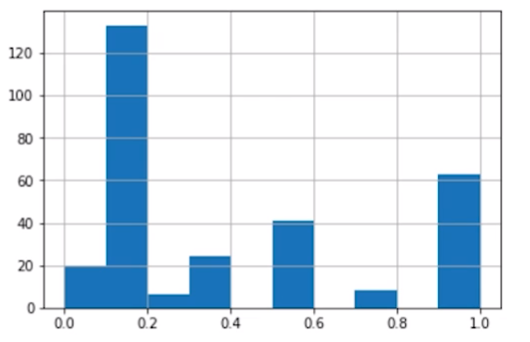

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred) #расчет метрики precision-точность
recall_score(y_test, y_pred) #расчет метрики recall-охват

y_pred_prob = best_csf.predict_proba(X_test) #вероятность отнесения к положительному или отрицательному классу
pd.Series(y_pred_prob[:, 1]).hist()

import numpy as np
np.where(y_pred_prob[:, 1] > 0.8, 1, 0)#ковертируем числовое значение вероятности в классы 0 или 1: если вероятность больше 0.8, то класс выжившие (1)


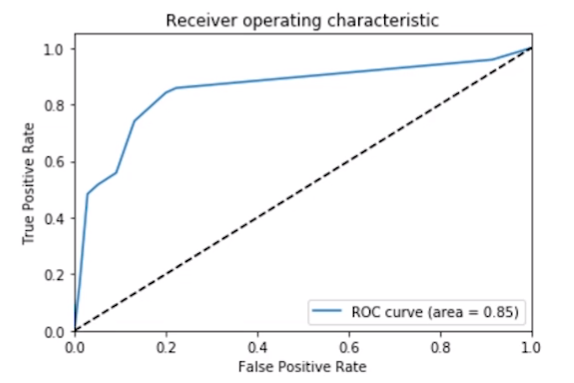

In [ ]:
data_tree = pd.read_csv('/content/train_data_tree.csv')
data_tree

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [ ]:
X_train = data_tree.drop(columns='num')
y_train = data_tree.num

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e1 = clf.tree_.impurity[l_node]

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'x[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

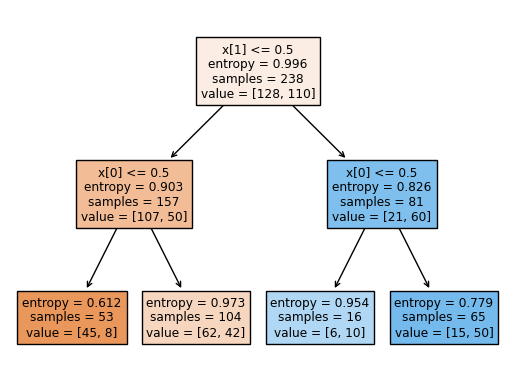

In [ ]:
tree.plot_tree(clf, filled=True)



In [ ]:
information_gain = clf.feature_importances_
information_gain

array([0.24090887, 0.75909113])

In [ ]:
IG = 0.996 - (53*65 + 0.612*0.779) / 118

In [ ]:
IG

-28.202955491525426

# Разделение данных:

## Split on train and test sets (Разделение на тренировочную и тестовую выборки):

Это самая простая и быстрая стратегия разделения данных.
Данные разбиваются на две части: тренировочную и тестовую.
Тренировочная часть используется для обучения модели, а тестовая часть для оценки ее производительности.
Однако, такая стратегия может быть менее надежной, особенно при небольшом количестве данных.

## K-fold cross-validation (K-блочная кросс-валидация):

Данные разбиваются на K блоков одинакового размера.
Модель обучается K раз, каждый раз используя K-1 блоков для тренировки и оставшийся блок для валидации.
Финальная оценка производительности модели вычисляется путем усреднения результатов K обучений.
Эта стратегия требует больше вычислительных мощностей, чем разделение на тренировочную и тестовую выборки, но устойчива к переобучению и обладает более надежной оценкой производительности.

## Leave One Out (LOO) cross-validation (Перекрестная валидация с исключением одного образца):

Каждый образец данных используется в качестве тестового один раз, а оставшиеся образцы используются для тренировки модели.
Эта стратегия является наиболее вычислительно затратной, так как модель должна быть обучена и протестирована для каждого образца.
LOO cross-validation обеспечивает наиболее надежную оценку производительности модели, но может быть неэффективной для больших наборов данных.

GridSearchCV перебирает все возможные комбинации гиперпараметров, заданных пользователем, и оценивает производительность модели для каждой комбинации с помощью кросс-валидации.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

model = DecisionTreeClassifier()

parameters = {'criterion': [ 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

search = GridSearchCV(model, parameters)

search.fit(X, y)

best_tree = search.best_estimator_

## поиск задания после которого пользователь ушёл


In [ ]:
data_suser = pd.read_csv('/content/event_data_train.csv')
data_suser

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632.0
1,32815,1434340848,passed,17632.0
2,32815,1434340848,discovered,17632.0
3,32811,1434340895,discovered,17632.0
4,32811,1434340895,viewed,17632.0
...,...,...,...,...
301612,34005,1435757369,viewed,6028.0
301613,33140,1435757374,viewed,1884.0
301614,33140,1435757374,discovered,1884.0
301615,33140,1435757374,passed,1884.0


In [ ]:
data_sub = pd.read_csv('/content/submissions_data_train.csv')
data_sub

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853.0
1,31972,1434348300,correct,15853.0
2,31972,1478852149,wrong,15853.0
3,31972,1478852164,correct,15853.0
4,31976,1434348123,wrong,15853.0
...,...,...,...,...
427274,31978,1516650311,correct,26607.0
427275,32031,1516673892,wrong,26607.0
427276,32031,1516673932,wrong,26607.0
427277,32031,1516673945,wrong,26607.0


In [ ]:
wrong_submissions = data_sub.query('submission_status == "wrong"')
group = wrong_submissions.groupby('step_id', as_index=False)
sorted_group = group.apply(lambda x: x.sort_values('step_id'))
sorted_group

step_id   timestamp submission_status  user_id_sub
0  111319    31971  1437609458             wrong         43.0
   188023    31971  1468443558             wrong      17639.0
   188024    31971  1468443984             wrong      17639.0
   188025    31971  1468444172             wrong      17639.0
   188026    31971  1468444455             wrong      17639.0
...            ...         ...               ...          ...
75 281512   120745  1487699462             wrong       8344.0
   424593   120745  1515922534             wrong       8394.0
   424592   120745  1515922528             wrong       8394.0
   932      120745  1475772602             wrong       8063.0
   217846   120745  1474092911             wrong      26678.0

[239067 rows x 4 columns]

In [ ]:
sorted_group['step_id'].value_counts()

31978    13635
32031    11152
32202    11115
33481     8919
32075     8279
         ...  
31988      580
31991      546
33362      444
32175      264
32929       37
Name: step_id, Length: 76, dtype: int64

## Добавление гиперпараметров дерева решений

In [ ]:
model = DecisionTreeClassifier()

parameters = {'criterion': ['entropy'], 'max_depth': '10', 'min_samples_split': '100', 'min_samples_leaf': '10'}

search = GridSearchCV(model, parameters)

### 1) min_impurity_decrease - Минимальное снижение "нечистоты" (смешения классов) узла при разделении, чтобы разделение произошло

### 2) min_samples_split-Минимальное число образцов в узле, чтобы его можно было разделить на 2

### 3) min_samples_leaf -Минимальное число образцов в листьях (при получившемся значении ниже разделение не будет произведено)

 Каждое деление узла уменьшает неопределенно